In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.1


In [2]:
# 1. Load Data
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

test_labels

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


train_images.shape

# Shape (60000, 28, 28) means there are 60,000 images in the training set, and each image is represented as 28 x 28 pixels.``


(60000, 28, 28)

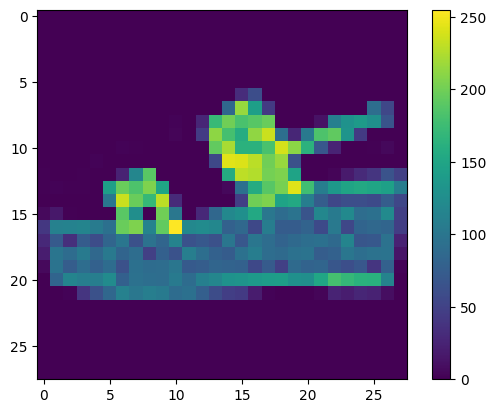

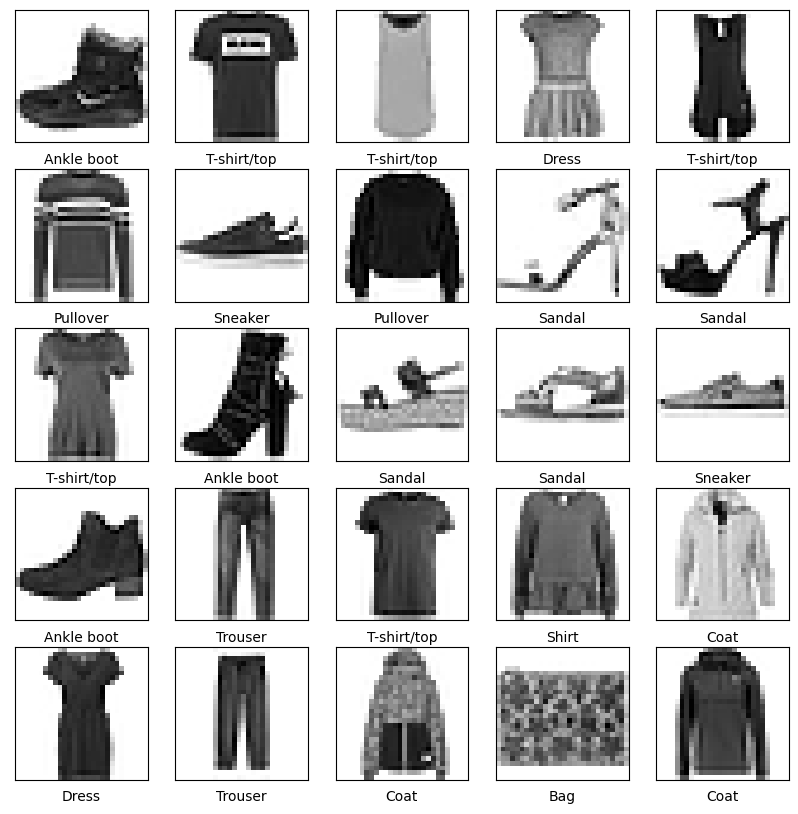

In [3]:
# 2. Peek Data

plt.figure()
plt.imshow(train_images[12])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [4]:
# 3. Preprocess Data

train_images = train_images / 255.0

test_images = test_images / 255.0

In [7]:
# 4. Train the Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)])
    
    
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Sparse Categorical Crossentropy is used when the labels are integers. If the labels are one-hot encoded, use Categorical Crossentropy.

'''
Sparse Categorical Crossentropy can be more memory-efficient than using one-hot encoding, since it avoids the need to create a dense one-hot encoded vector for each target label.
In addition, sparse labels can be more convenient to work with when you have a large number of classes, since they require less memory and can be more computationally efficient.
'''

model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4962 - accuracy: 0.8268
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3737 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3349 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3104 - accuracy: 0.8871
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2947 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2779 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2655 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2571 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2451 - accuracy: 0.9096
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [8]:
# 5. Evaluate Accuracy

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3404 - accuracy: 0.8798 - 699ms/epoch - 2ms/step

Test accuracy: 0.879800021648407


In [9]:
# 6. Make Predictions

'''
With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.
'''

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]



313/313 [==============================] - 0s 987us/step


array([3.7820132e-07, 2.5615774e-09, 2.9382202e-08, 6.2558972e-11,
       2.9713909e-09, 6.9283281e-04, 2.5302920e-06, 6.7792255e-03,
       6.8863989e-07, 9.9252433e-01], dtype=float32)

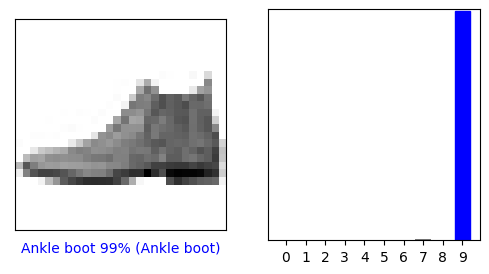

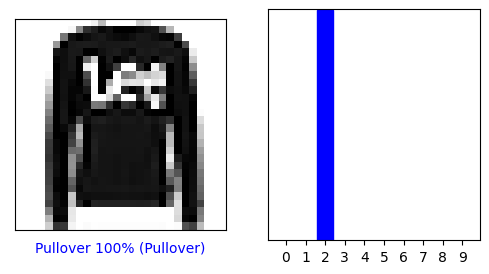

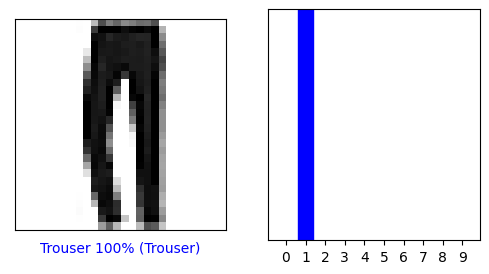

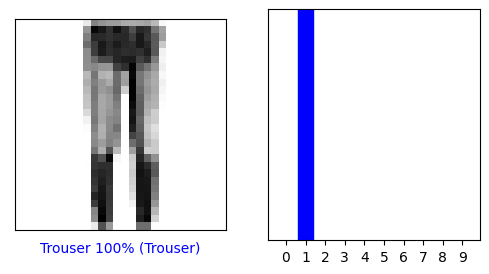

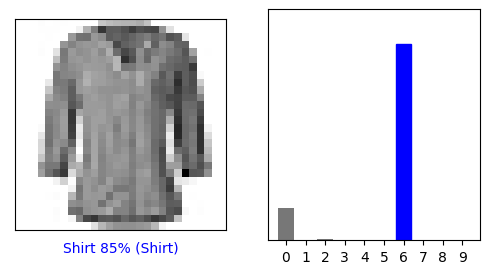

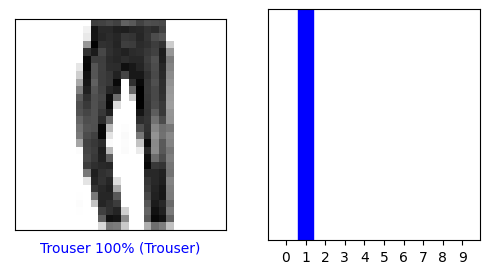

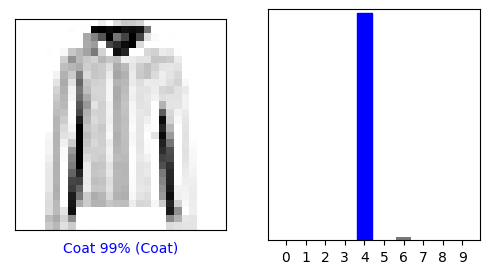

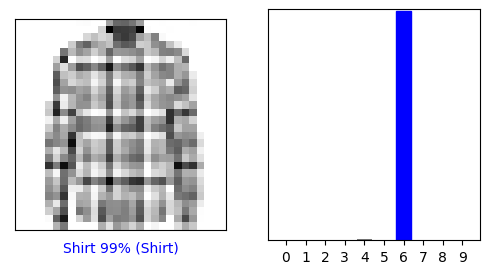

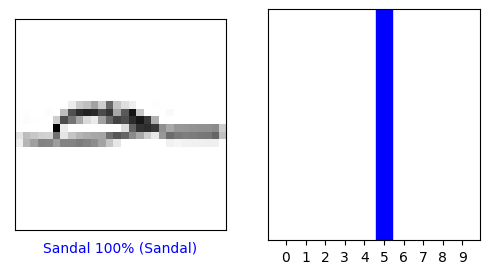

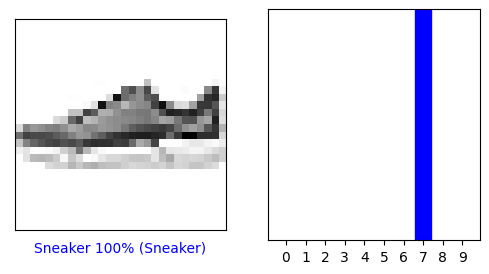

In [11]:
# 7. Verify Predictions

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  

for i in range(10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()